# Dijkstra's Algorithm

Dijkstra's Algorithm is a useful graph traversal algorithm developed by famed computer scientist Edsgar W. Dijkstra. In short, Dijkstra's algorithm is an algorithm that is used to find the shortest paths from the source vertex to different vertices in the graph.

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from helper import draw_graph, clear_marks
import numpy as np

## Undirected Graph


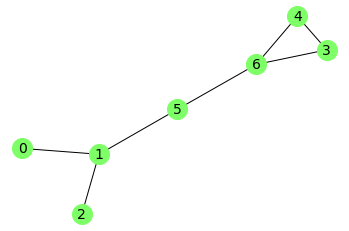

In [5]:
G = nx.Graph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)



```
function Dijkstra(Graph, source):
    distance at source vertex = 0
    
    for range of amount of vertices:
        for range of amount of vertices:
            if vertex was not visited and distance is less than infinity:
                save distance of specific vertex as minimun
                save the vertex           
        vertex saved is marked as visited
            
        for range of amount of vertices:
            if distance from saved vertex to current vertex is greater than zero and 
            vertex was not visited and 
            distance of current vertex > distance of minimin vertex saved above + distance from saved vertex to current vertex:
                distance of current vertex = distance of minimin vertex saved above + distance from saved vertex to current vertex
```
                
               
                    

In [25]:
def dijkstra(G, source): 
        distance = [np.inf] * len(G.nodes) 
        distance[source] = 0
        short_path = [False] * len(G.nodes) 
   
        for i in range(len(G.nodes)): 
        
            min = np.inf 
   
            for j in range(len(G.nodes)): 
                if distance[j] < min and short_path[j] == False: 
                    min = distance[j] 
                    min_index = j
            j = min_index
            short_path[j] = True
   
            for k in range(len(G.nodes)): 
                if (A[j][k] > 0) and (short_path[k] == False) and (distance[k] > distance[j] + A[j][k]): 
                    distance[k] = distance[j] + A[j][k]
                    
        print ("Graph Vertex \t Distance from Source") 
        print("-------------------------------------")
        for node in range(len(G.nodes)): 
            print (node, "\t\t", distance[node]) 
   

In [26]:
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [28]:
dijkstra(G,0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 1.0
2 		 2.0
3 		 inf
4 		 inf
5 		 2.0
6 		 3.0


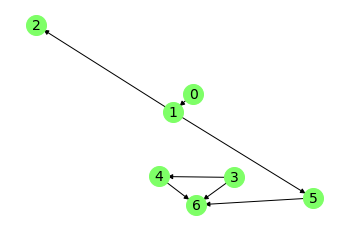

In [20]:
G = nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)

In [21]:
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [22]:
dijkstra(G, 0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 1.0
2 		 2.0
3 		 inf
4 		 inf
5 		 2.0
6 		 3.0


In [ ]:
G = nx.Graph()
G.add_edge(0, 1,weight=2.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=6.0)
G.add_edge(3, 6,weight=7.0)
G.add_edge(4, 6,weight=2.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)

In [ ]:
A = nx.to_numpy_array(G)
print(A)

In [ ]:
dijkstra(G, 0)

In [ ]:
G = nx.DiGraph()
G.add_edge(0, 1,weight=2.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=6.0)
G.add_edge(3, 6,weight=7.0)
G.add_edge(4, 6,weight=2.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)


In [ ]:
A = nx.to_numpy_array(G)
print(A)

In [23]:
dijkstra(G, 0)

Graph Vertex 	 Distance from Source
-------------------------------------
0 		 0
1 		 1.0
2 		 2.0
3 		 inf
4 		 inf
5 		 2.0
6 		 3.0
